In [1]:
pip install -U -q google.generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 9.8 MB/s eta 0:00:00


In [2]:
import textwrap
import numpy as np
import pandas as pd

import google.generativeai as genai
import google.ai.generativelanguage as glm

# Used to securely store your API key
from google.colab import userdata

from IPython.display import Markdown

In [4]:
API_KEY=userdata.get('API_KEY')

genai.configure(api_key=API_KEY)

Next, you will choose a model. Any embedding model will work for this. At this time Gemini API is only available at this time.

In [5]:
for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004


**Embedding Generation**

In this section, you will see how to generate embeddings for a piece of text using the embeddings from the Gemini API. For the new embeddings model, embedding-001, there is a new task type parameter and the optional title (only valid with task_type=RETRIEVAL_DOCUMENT).

In [6]:
title = "The next generation of AI for developers and Google Workspace"
sample_text = ("Title: The next generation of AI for developers and Google Workspace"
    "\n"
    "Full article:\n"
    "\n"
    "Gemini API & Google AI Studio: An approachable way to explore and prototype with generative AI applications")

model = 'models/embedding-001'
embedding = genai.embed_content(model=model,
                                content=sample_text,
                                task_type="retrieval_document",
                                title=title)

print(embedding)

{'embedding': [0.03411343, -0.05517662, -0.020209055, -0.0041249567, 0.058917783, 0.014129515, 0.0045353593, 0.0014303668, 0.05976634, 0.08292115, 0.007162964, 0.0069041685, -0.053083427, -0.010905125, 0.0321402, -0.037163995, 0.050372455, 0.019348344, -0.037328612, 0.026647927, 0.030781753, -0.011288501, -0.031485256, -0.060248993, -0.026219442, -0.009794235, 0.006630139, -0.01846516, -0.026324715, 0.020442624, -0.06317684, 0.014559574, -0.052296035, 0.016451128, -9.720217e-05, -0.051706687, -0.0054406044, -0.056967627, 0.011144145, -0.009201792, -0.0021951047, -0.1099701, -0.011712193, 0.021221714, 0.009171804, -0.029621972, 0.034534883, 0.039578073, 0.019021519, -0.06269169, 0.039473332, 0.052403256, 0.061814185, -0.034507945, -0.009557816, -0.0049551064, 0.017839009, -0.021176832, 0.015043588, 0.015390569, -0.006334281, 0.043696404, -0.028341983, 0.028433999, 0.01472686, -0.06585564, -0.044533554, 0.0055523133, 0.035775978, 0.031099156, 0.027357662, 0.028062241, 0.056972917, -0.054

**Building an Embedding Database**

Here are three sample texts to use to build the embeddings database. You will use the Gemini API to create embeddings of each of the documents.

In [7]:
DOCUMENT1 = {
    "title": "Operating the Climate Control System",
    "content": "Your Googlecar has a climate control system that allows you to adjust the temperature and airflow in the car. To operate the climate control system, use the buttons and knobs located on the center console.  Temperature: The temperature knob controls the temperature inside the car. Turn the knob clockwise to increase the temperature or counterclockwise to decrease the temperature. Airflow: The airflow knob controls the amount of airflow inside the car. Turn the knob clockwise to increase the airflow or counterclockwise to decrease the airflow. Fan speed: The fan speed knob controls the speed of the fan. Turn the knob clockwise to increase the fan speed or counterclockwise to decrease the fan speed. Mode: The mode button allows you to select the desired mode. The available modes are: Auto: The car will automatically adjust the temperature and airflow to maintain a comfortable level. Cool: The car will blow cool air into the car. Heat: The car will blow warm air into the car. Defrost: The car will blow warm air onto the windshield to defrost it."}
DOCUMENT2 = {
    "title": "Touchscreen",
    "content": "Your Googlecar has a large touchscreen display that provides access to a variety of features, including navigation, entertainment, and climate control. To use the touchscreen display, simply touch the desired icon.  For example, you can touch the \"Navigation\" icon to get directions to your destination or touch the \"Music\" icon to play your favorite songs."}
DOCUMENT3 = {
    "title": "Shifting Gears",
    "content": "Your Googlecar has an automatic transmission. To shift gears, simply move the shift lever to the desired position.  Park: This position is used when you are parked. The wheels are locked and the car cannot move. Reverse: This position is used to back up. Neutral: This position is used when you are stopped at a light or in traffic. The car is not in gear and will not move unless you press the gas pedal. Drive: This position is used to drive forward. Low: This position is used for driving in snow or other slippery conditions."}

documents = [DOCUMENT1, DOCUMENT2, DOCUMENT3]

Organize the contents of the dictionary into a dataframe for better visualization.

In [8]:
df = pd.DataFrame(documents)
df.columns = ['Title', 'Text']
df

,Title,Text
0,Operating the Climate Control System,Your Googlecar has a climate control system th...
1,Touchscreen,Your Googlecar has a large touchscreen display...
2,Shifting Gears,Your Googlecar has an automatic transmission. ...


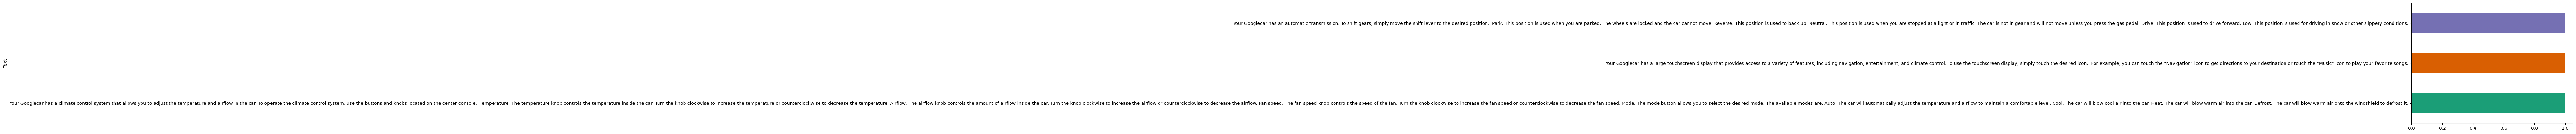

In [13]:
# @title Text

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Get the embeddings for each of these bodies of text. Add this information to the dataframe.

In [9]:
# Get the embeddings of each text and add to an embeddings column in the dataframe
def embed_fn(title, text):
  return genai.embed_content(model=model,
                             content=text,
                             task_type="retrieval_document",
                             title=title)["embedding"]

df['Embeddings'] = df.apply(lambda row: embed_fn(row['Title'], row['Text']), axis=1)
df

,Title,Text,Embeddings
0,Operating the Climate Control System,Your Googlecar has a climate control system th...,"[-0.033361107, -0.021217084, -0.049581926, -0...."
1,Touchscreen,Your Googlecar has a large touchscreen display...,"[0.009660736, -0.030662702, -0.017281422, -0.0..."
2,Shifting Gears,Your Googlecar has an automatic transmission. ...,"[-0.04270796, -0.007160868, -0.03242516, -0.02..."


**Document Search with Q/A**

Now that the embeddings are generated, let's create a Q&A system to search these documents. You will ask a question about hyperparameter tuning, create an embedding of the question, and compare it against the collection of embeddings in the dataframe.

The embedding of the question will be a vector (list of float values), which will be compared against the vector of the documents using the dot product. This vector returned from the API is already normalized. The dot product represents the similarity in direction between two vectors.

The values of the dot product can range between -1 and 1, inclusive. If the dot product between two vectors is 1, then the vectors are in the same direction. If the dot product value is 0, then these vectors are orthogonal, or unrelated, to each other. Lastly, if the dot product is -1, then the vectors point in the opposite direction and are not similar to each other.

Note, with the new embeddings model (embedding-001), specify the task type as QUERY for user query and DOCUMENT when embedding a document text.

In [10]:
query = "How do you shift gears in the Google car?"
model = 'models/embedding-001'

request = genai.embed_content(model=model,
                              content=query,
                              task_type="retrieval_query")

Use the find_best_passage function to calculate the dot products, and then sort the dataframe from the largest to smallest dot product value to retrieve the relevant passage out of the database.

In [11]:
def find_best_passage(query, dataframe):
  """
  Compute the distances between the query and each document in the dataframe
  using the dot product.
  """
  query_embedding = genai.embed_content(model=model,
                                        content=query,
                                        task_type="retrieval_query")
  dot_products = np.dot(np.stack(dataframe['Embeddings']), query_embedding["embedding"])
  idx = np.argmax(dot_products)
  return dataframe.iloc[idx]['Text'] # Return text from index with max value

View the most relevant document from the database:

In [12]:
passage = find_best_passage(query, df)
passage

'Your Googlecar has an automatic transmission. To shift gears, simply move the shift lever to the desired position.  Park: This position is used when you are parked. The wheels are locked and the car cannot move. Reverse: This position is used to back up. Neutral: This position is used when you are stopped at a light or in traffic. The car is not in gear and will not move unless you press the gas pedal. Drive: This position is used to drive forward. Low: This position is used for driving in snow or other slippery conditions.'